In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [6]:
data = scipy.io.loadmat('../../Downloads/ex7data2.mat')
X = data['X']
X.shape

(300, 2)

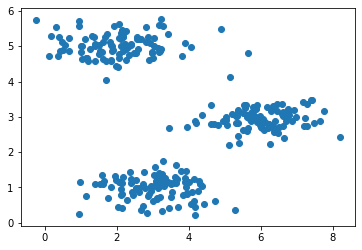

In [8]:
plt.scatter(X[:, 0], X[:, 1])

In [60]:
# Find which centroid is at minimum distance from each sample
def findMinCentroids(X, centroids):
    idx = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        idx[i][0] = np.argmin(np.sum((X[i] - centroids) ** 2, axis=1))
    return idx.astype('int64')

In [61]:
# Find new position of each centroid
# New position is mean of samples which are closest to that centroid
def updateCentroids(X, idx, K):
    centroids = np.zeros((K, 2))
    for i in range(centroids.shape[0]):
        test = X[(idx == i).reshape(idx.shape[0])]
        mean = np.mean(test, axis=0)
        centroids[i] = mean
    return centroids

In [62]:
def calcCost(X, idx, centroids):
    cost = 0
    for i in range(X.shape[0]):
        cost += np.sum((X[i] - centroids[idx[i]]) ** 2)
    cost /= X.shape[0]
    return cost

In [64]:
def KMeans(X, init_centroids, num_iters):
    K = init_centroids.shape[0]
    centroids = np.copy(init_centroids)
    #idx = np.zeros((X.shape[0], 1))
    costHistory = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        idx = findMinCentroids(X, centroids)
        centroids = updateCentroids(X, idx, K)
        costHistory[i][0] = calcCost(X, idx, centroids)
    
    return centroids, idx, costHistory

In [37]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findMinCentroids(X, initial_centroids)

In [57]:
centroids = updateCentroids(X, idx, 3)

In [65]:
centroids, idx, costHistory = KMeans(X, initial_centroids, 10)

In [66]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

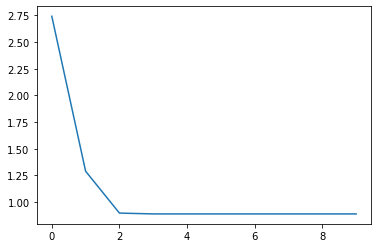

In [67]:
plt.plot(costHistory)

In [76]:
def plotKMeans(X, idx, centroids, K):
    color = "rgb"
    for i in range(K):
        Xi = X[(idx == i).reshape(idx.shape[0])]
        plt.scatter(Xi[:, 0], Xi[:, 1], c=color[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="black")

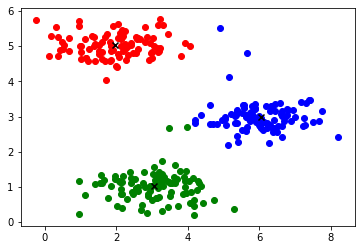

In [77]:
plotKMeans(X, idx, centroids, K)